**CII4L3 VISUALISASI DATA**

---

# Midterm project

---

<p>Nama = Reynhard Powiwi</p>
<p>Kelas = IF-44-PIL-DS02 📚🎓</p>

---


**Link Tambahan**
* [Kaggle Dataset](https://www.kaggle.com/datasets/willianoliveiragibin/fatalities-in-the-israeli-palestinian/data)
* [Video Presentasi](https://drive.google.com/file/d/11lr_vpYRj13ExekwPt1GW7LcZdI-Jaf7/view?usp=sharing)


In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory


import os

for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/fatalities-in-the-israeli-palestinian/fatalities_isr_pse_conflict_2000_to_2023.csv


# **Library Import**

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

# **Data Import**

In [3]:
data = pd.read_csv("/kaggle/input/fatalities-in-the-israeli-palestinian/fatalities_isr_pse_conflict_2000_to_2023.csv")
data.head()

,name,date_of_event,age,citizenship,event_location,event_location_district,event_location_region,date_of_death,gender,took_part_in_the_hostilities,place_of_residence,place_of_residence_district,type_of_injury,ammunition,killed_by,notes
0,'Abd a-Rahman Suleiman Muhammad Abu Daghash,2023-09-24,32.0,Palestinian,Nur Shams R.C.,Tulkarm,West Bank,2023-09-24,M,NaN,Nur Shams R.C.,Tulkarm,gunfire,live ammunition,Israeli security forces,Fatally shot by Israeli forces while standing ...
1,Usayed Farhan Muhammad 'Ali Abu 'Ali,2023-09-24,21.0,Palestinian,Nur Shams R.C.,Tulkarm,West Bank,2023-09-24,M,NaN,Nur Shams R.C.,Tulkarm,gunfire,live ammunition,Israeli security forces,Fatally shot by Israeli forces while trying to...
2,'Abdallah 'Imad Sa'ed Abu Hassan,2023-09-22,16.0,Palestinian,Kfar Dan,Jenin,West Bank,2023-09-22,M,NaN,al-Yamun,Jenin,gunfire,live ammunition,Israeli security forces,Fatally shot by soldiers while firing at them ...
3,Durgham Muhammad Yihya al-Akhras,2023-09-20,19.0,Palestinian,'Aqbat Jaber R.C.,Jericho,West Bank,2023-09-20,M,NaN,'Aqbat Jaber R.C.,Jericho,gunfire,live ammunition,Israeli security forces,Shot in the head by Israeli forces while throw...
4,Raafat 'Omar Ahmad Khamaisah,2023-09-19,15.0,Palestinian,Jenin R.C.,Jenin,West Bank,2023-09-19,M,NaN,Jenin,Jenin,gunfire,live ammunition,Israeli security forces,Wounded by soldiers’ gunfire after running awa...


# **Data Analyse**

Menampilkan dimensi data, yaitu jumlah baris dan kolom dalam dataset.

In [4]:
data.shape

(11124, 16)

Menampilkan informasi rinci tentang dataset, seperti tipe data setiap kolom, jumlah nilai non-null, dan penggunaan memori.

In [5]:
data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11124 entries, 0 to 11123
Data columns (total 16 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   name                          11124 non-null  object 
 1   date_of_event                 11124 non-null  object 
 2   age                           10995 non-null  float64
 3   citizenship                   11124 non-null  object 
 4   event_location                11124 non-null  object 
 5   event_location_district       11124 non-null  object 
 6   event_location_region         11124 non-null  object 
 7   date_of_death                 11124 non-null  object 
 8   gender                        11104 non-null  object 
 9   took_part_in_the_hostilities  9694 non-null   object 
 10  place_of_residence            11056 non-null  object 
 11  place_of_residence_district   11056 non-null  object 
 12  type_of_injury                10833 non-null  object 
 13  a

menghitung jumlah nilai yang hilang (NaN) untuk setiap kolom dalam dataset.

In [6]:
data.isna().sum()

name                               0
date_of_event                      0
age                              129
citizenship                        0
event_location                     0
event_location_district            0
event_location_region              0
date_of_death                      0
gender                            20
took_part_in_the_hostilities    1430
place_of_residence                68
place_of_residence_district       68
type_of_injury                   291
ammunition                      5253
killed_by                          0
notes                            280
dtype: int64

Menampilkan jumlah nilai unik untuk setiap kolom dalam dataset.

In [7]:
data.nunique()

name                            11083
date_of_event                    2405
age                                95
citizenship                         4
event_location                    494
event_location_district            20
event_location_region               3
date_of_death                    2593
gender                              2
took_part_in_the_hostilities        5
place_of_residence                580
place_of_residence_district        20
type_of_injury                     13
ammunition                         21
killed_by                           3
notes                            6744
dtype: int64

menghapus duplikat baris dari dataset.

In [8]:
data.drop_duplicates(inplace=True)  
data.shape

(11117, 16)

# **Preparing Data**

Mengubah kolom date ke panda datetime

In [11]:
data['date_of_event'] = pd.to_datetime(data['date_of_event'])
data['date_of_death'] = pd.to_datetime(data['date_of_death'])

Menghapus kolom yang tidak dibutuhkan

In [ ]:
data.drop("notes", inplace=True, axis=1)

Memeriksa kolom yang kosong (Na)

In [14]:
data.isna().sum()

name                               0
date_of_event                      0
age                              122
citizenship                        0
event_location                     0
event_location_district            0
event_location_region              0
date_of_death                      0
gender                            14
took_part_in_the_hostilities    1430
place_of_residence                61
place_of_residence_district       61
type_of_injury                   290
ammunition                      5246
killed_by                          0
dtype: int64

Karena kita hanya mempunyai satu variabel yaitu 'age' jadi kita mengisi variabel ini dengan mean. Untuk variabel kategori lainnya diisi dengan mode atau nilai yang paling sering muncul di variabel tersebut. Sehingga tidak lagi didapatkan variabel yang kosong.

In [15]:
mean_age = data["age"].mean()
data["age"].fillna(mean_age, inplace=True)
for columns in data.columns[8:14]:
    mode_value = data[columns].mode().iloc[0]
    data[columns].fillna(mode_value, inplace=True)
data.isna().sum()

name                            0
date_of_event                   0
age                             0
citizenship                     0
event_location                  0
event_location_district         0
event_location_region           0
date_of_death                   0
gender                          0
took_part_in_the_hostilities    0
place_of_residence              0
place_of_residence_district     0
type_of_injury                  0
ammunition                      0
killed_by                       0
dtype: int64

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11117 entries, 0 to 11123
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   name                          11117 non-null  object        
 1   date_of_event                 11117 non-null  datetime64[ns]
 2   age                           11117 non-null  float64       
 3   citizenship                   11117 non-null  object        
 4   event_location                11117 non-null  object        
 5   event_location_district       11117 non-null  object        
 6   event_location_region         11117 non-null  object        
 7   date_of_death                 11117 non-null  datetime64[ns]
 8   gender                        11117 non-null  object        
 9   took_part_in_the_hostilities  11117 non-null  object        
 10  place_of_residence            11117 non-null  object        
 11  place_of_residence_district   111

# Tugas 1

**Nama Tugas** :
Analisis Keterlibatan Gender dalam Konflik Israel-Palestina

**Deskripsi Tugas:**
Lakukan analisis terhadap keterlibatan gender dalam konflik Israel-Palestina dengan menggunakan data kematian dan informasi keterlibatan.

**Langkah-langkah:**
1. Pisahkan data berdasarkan gender (pria/wanita).
2. Hitung jumlah kematian untuk setiap gender pada setiap tahun.
3. Gunakan Scatter plot untuk menunjukkan tren kematian per gender dari tahun 2000 hingga 2023.

**Tujuan:**
Memahami perbedaan keterlibatan gender dalam konflik tersebut dan mengidentifikasi pola atau tren signifikan.

In [17]:
# Membuat kolom baru 'year' untuk menyimpan tahun dari tanggal peristiwa
data['year'] = data['date_of_event'].dt.year

# Menghitung jumlah korban per gender per tahun
gender_counts = data.groupby(['year', 'gender']).size().reset_index(name='total_fatalities')

gender_counts.head()

,year,gender,total_fatalities
0,2000,F,7
1,2000,M,28
2,2001,F,65
3,2001,M,285
4,2002,F,198


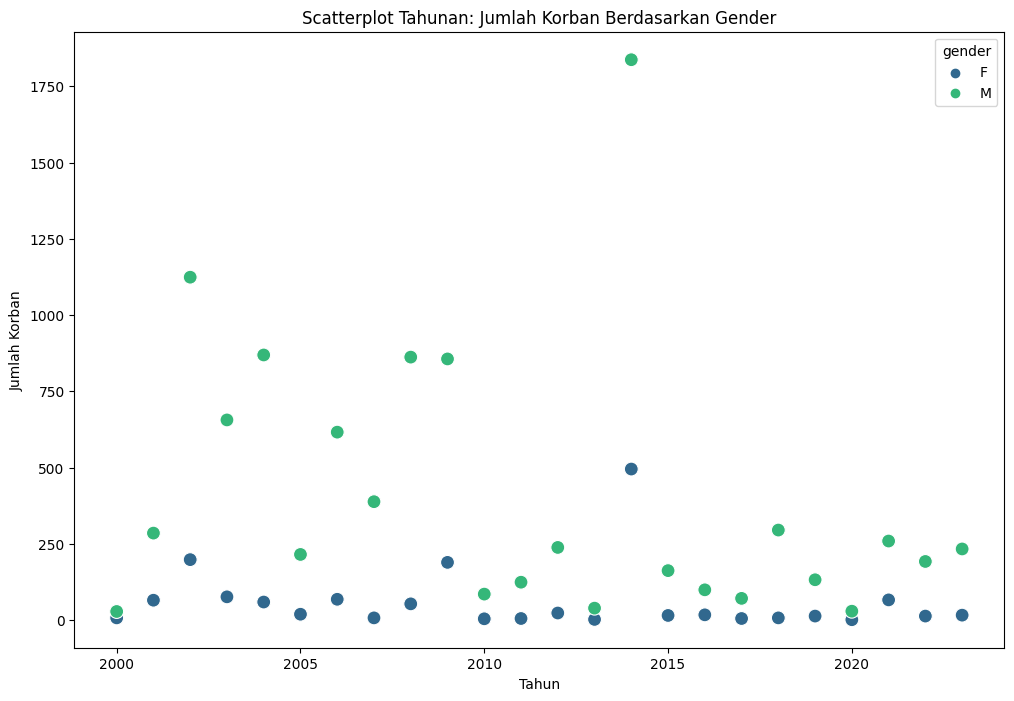

In [18]:
# Scatter plot untuk visualisasi data pertahun mengenai jumlah korban berdasarkan gender
plt.figure(figsize=(12, 8))
sns.scatterplot(x='year', y='total_fatalities', hue='gender', data=gender_counts, palette='viridis', s=100)
plt.title('Scatterplot Tahunan: Jumlah Korban Berdasarkan Gender')
plt.xlabel('Tahun')
plt.ylabel('Jumlah Korban')
plt.show()

# Tugas 2 

**Nama Tugas** :
Analisis Keterlibatan Gender dalam Konflik Israel-Palestina

**Deskripsi Tugas:**
Lakukan analisis terhadap keterlibatan gender dalam konflik Israel-Palestina dengan menggunakan data kematian dan informasi keterlibatan.

**Langkah-langkah:**
1. Pisahkan data berdasarkan gender (pria/wanita).
2. Hitung jumlah kematian untuk setiap gender pada setiap tahun.
3. Gunakan line plot untuk menunjukkan tren kematian per gender dari tahun 2000 hingga 2023.

**Tujuan:**
Memahami perbedaan keterlibatan gender dalam konflik tersebut dan mengidentifikasi pola atau tren signifikan.

In [19]:
# Pisahkan data berdasarkan gender
male_data = data[data['gender'] == 'M']
female_data = data[data['gender'] == 'F']

# Melihat jumlah nilai dari male_data dan female_data
print("Jumlah data pria :", len(male_data))
print("Jumlah data wanita :", len(female_data))


Jumlah data pria : 9694
Jumlah data wanita : 1423


In [20]:
# Hitung jumlah kematian per gender per tahun
male_fatalities= male_data.groupby(data['date_of_event'].dt.year).size().reset_index(name='male_fatalities')
female_fatalities = female_data.groupby(data['date_of_event'].dt.year).size().reset_index(name='female_fatalities')

# Menampilkan hasil secara bersamaan
print("Jumlah Kematian Pria: \n")
print(male_fatalities.tail())

print("\nJumlah Kematian Wanita: \n")
print(female_fatalities.tail())

Jumlah Kematian Pria: 

    date_of_event  male_fatalities
19           2019              132
20           2020               29
21           2021              259
22           2022              192
23           2023              233

Jumlah Kematian Wanita: 

    date_of_event  female_fatalities
19           2019                 13
20           2020                  1
21           2021                 66
22           2022                 13
23           2023                 16


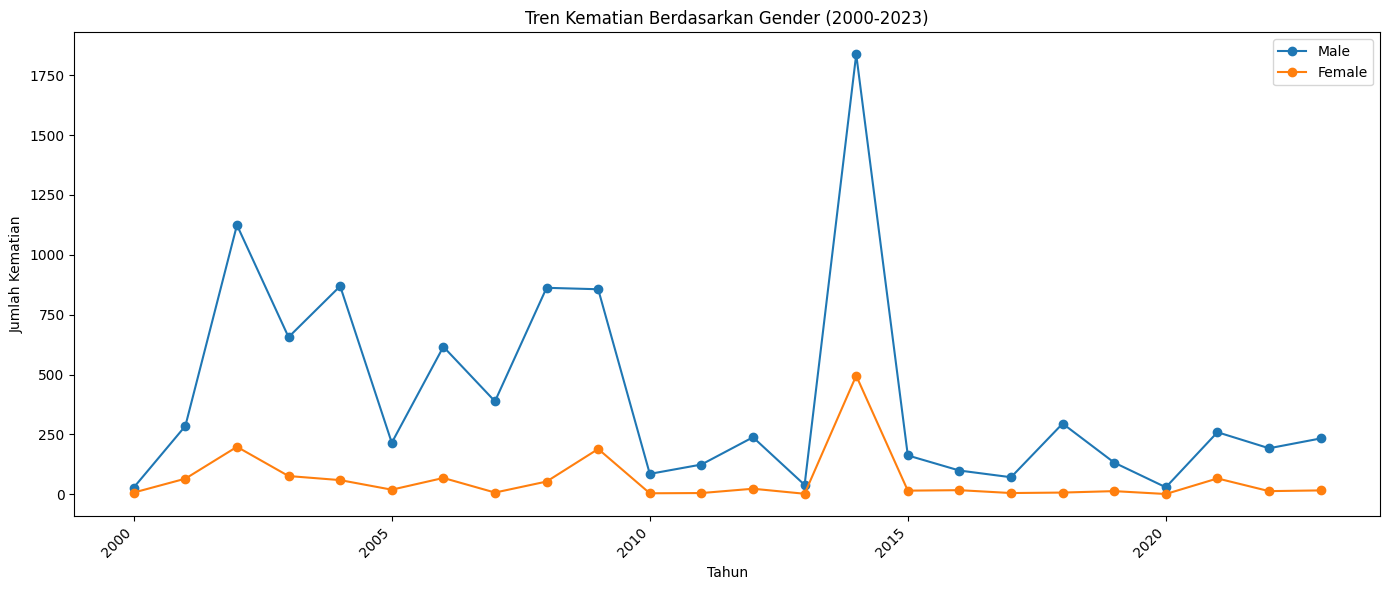

In [21]:
# Line plot untuk menunjukkan tren kematian per gender dari tahun 2000 hingga 2023
plt.figure(figsize=(14, 6))
plt.plot(male_fatalities['date_of_event'], male_fatalities['male_fatalities'], label='Male', marker='o')
plt.plot(female_fatalities['date_of_event'], female_fatalities['female_fatalities'], label='Female', marker='o')
plt.title('Tren Kematian Berdasarkan Gender (2000-2023)')
plt.xlabel('Tahun')
plt.ylabel('Jumlah Kematian')
plt.legend()
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Tugas 3

**Nama Tugas** :
Visualisasikan 5 distrik tempat tinggal dengan jumlah kematian terbanyak

**Deskripsi Tugas:**
Lakukan analisis terhadap distrik tempat tinggal dalam konflik Israel-Palestina

**Langkah-langkah:**
1. Hitung jumlah korban dalam setiap distrik
2. Mengambil 5 distrik teratas
3. Gunakan pie chart untuk menunjukkan distrik yang paling memakan banyak korban

**Tujuan:**
Mengetahui distrik tempat tinggal yang paling banyak kematian

In [22]:
# Menghitung jumlah korban dalam setiap distrik tempat tinggal
district_counts = data['place_of_residence_district'].value_counts()

district_counts

place_of_residence_district
Gaza                    2514
North Gaza              1831
Khan Yunis              1367
Rafah                   1097
Deir al-Balah            875
Israel                   726
Nablus                   621
Jenin                    540
Hebron                   380
Ramallah and al-Bira     295
Tulkarm                  258
Bethlehem                167
East Jerusalem           121
al-Quds                  102
Qalqiliya                 66
Tubas                     56
Salfit                    47
Jericho                   34
Gush Katif                16
West Bank                  4
Name: count, dtype: int64

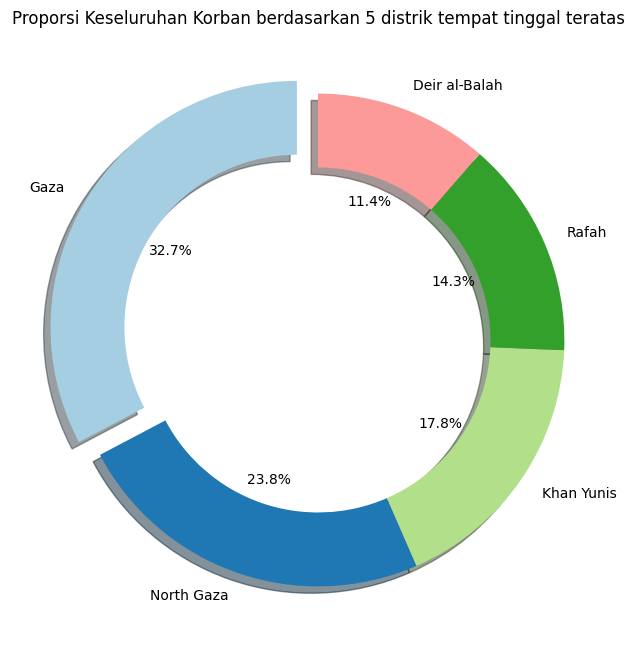

In [23]:
# Ambil 5 distrik teratas untuk visualisasi yang lebih baik
top_districts = district_counts.head(5)

# Warna untuk Pie Chart
colors = plt.cm.Paired(range(len(top_districts)))

# Eksplorasi untuk distrik terpenting
explode = [0.1 if idx == 0 else 0 for idx in range(len(top_districts))]

# Gambarkan pie chart
plt.figure(figsize=(12, 8))
plt.pie(top_districts, labels=top_districts.index, autopct='%1.1f%%', startangle=90,
        colors=colors, explode=explode, shadow=True, wedgeprops=dict(width=0.3))
plt.title(f'Proporsi Keseluruhan Korban berdasarkan 5 distrik tempat tinggal teratas')
plt.show()

# Tugas 4 

**Nama Tugas** :
Analisis Keterlibatan Umur dan Tempat tinggal dalam Konflik Israel-Palestina

**Deskripsi Tugas:**
Lakukan analisis terhadap keterlibatan Umur dalam konflik Israel-Palestina dengan menggunakan data distrik tempat tinggal korban 

**Langkah-langkah:**
1. Menghitung rata-rata umur korban 
2. Mengabungkan distrik dan rata-rata umur korban

**Tujuan:**
Memahami keterlibatan umur dalam konflik tersebut dan mengidentifikasi pola atau tren signifikan.

In [24]:
# Menyiapkan data untuk analisis

age_location_data = data[['age', 'place_of_residence_district']]

# Membersihkan data dari nilai null
age_location_data = age_location_data.dropna()

# Mengganti tipe data kolom usia menjadi integer
age_location_data['age'] = age_location_data['age'].astype(int)

#Mengabungkan data distrik dan rata-rata umur
age_location = age_location_data.groupby('place_of_residence_district')['age'].mean().sort_values()

age_location

place_of_residence_district
al-Quds                 23.196078
Tubas                   23.589286
West Bank               24.750000
Jenin                   24.940741
Ramallah and al-Bira    25.210169
North Gaza              25.453850
Deir al-Balah           25.568000
Rafah                   25.726527
Hebron                  25.918421
Nablus                  26.177134
Qalqiliya               26.287879
Khan Yunis              26.408193
Gaza                    26.585521
Salfit                  26.659574
Gush Katif              27.000000
Tulkarm                 27.589147
Bethlehem               27.922156
Jericho                 28.147059
East Jerusalem          30.338843
Israel                  36.473829
Name: age, dtype: float64

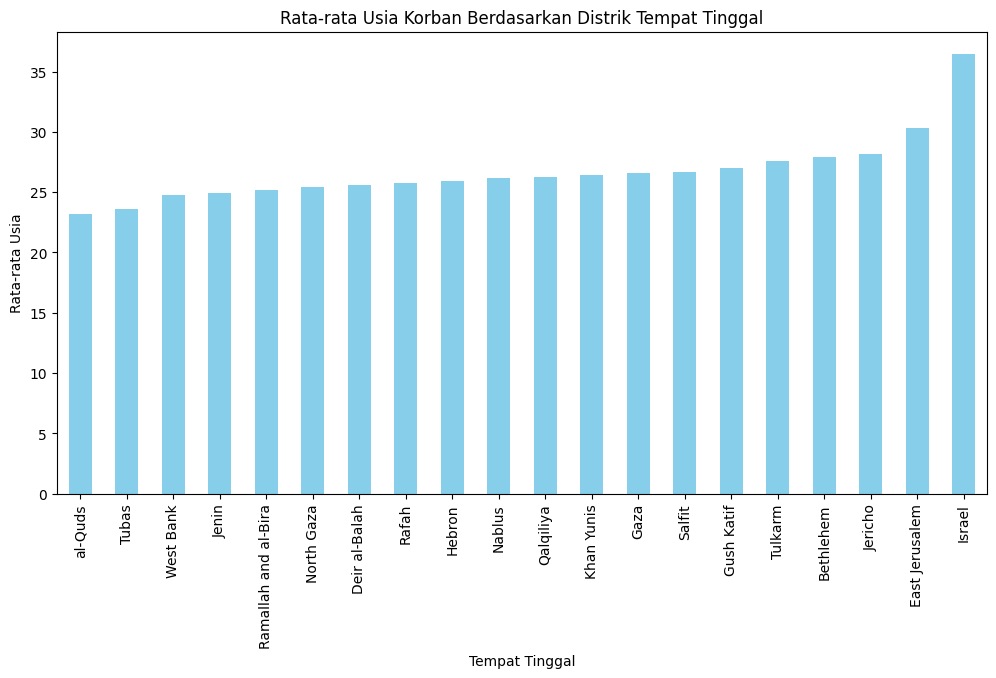

In [25]:
# Membuat Barplot
plt.figure(figsize=(12, 6))
age_location.plot(kind='bar', color='skyblue')
plt.title('Rata-rata Usia Korban Berdasarkan Distrik Tempat Tinggal')
plt.xlabel('Tempat Tinggal')
plt.ylabel('Rata-rata Usia')
plt.show()

# Tugas 5

**Nama Tugas** :
Visualisasikan korban jiwa dalam Konflik Israel-Palestina pada kewarganegaraan palestina dari 2013 - 2014

**Deskripsi Tugas:**
Lakukan visualisasi terhadap data kewarganegaraan dalam konflik Israel-Palestina

**Langkah-langkah:**
1. Ambil data untuk kewarganegaraan Palestine pada 2013 - 2014
2. Hitung jumlah kematian di setiap kejiadian
3. Gunakan Box plot untuk menunjukkan distribusi data

**Tujuan:**
Memahami melihat distribusi data kematian kewarganegaraan palestina dalam konflik Israel-Palestina di tahun 2013-2014

In [ ]:
# Mengambil data untuk kewarganegaraan "Palestinian" antara 2013-2014
data_palestinian_2013_2014 = data[(data['date_of_event'].dt.year >= 2013) & (data['date_of_event'].dt.year <= 2014) & (data['citizenship'] == 'Palestinian')].copy()

# Menghitung total korban per kejadian
data_palestinian_2013_2014['total_fatalities'] = data_palestinian_2013_2014.groupby('date_of_event')['date_of_event'].transform('count')

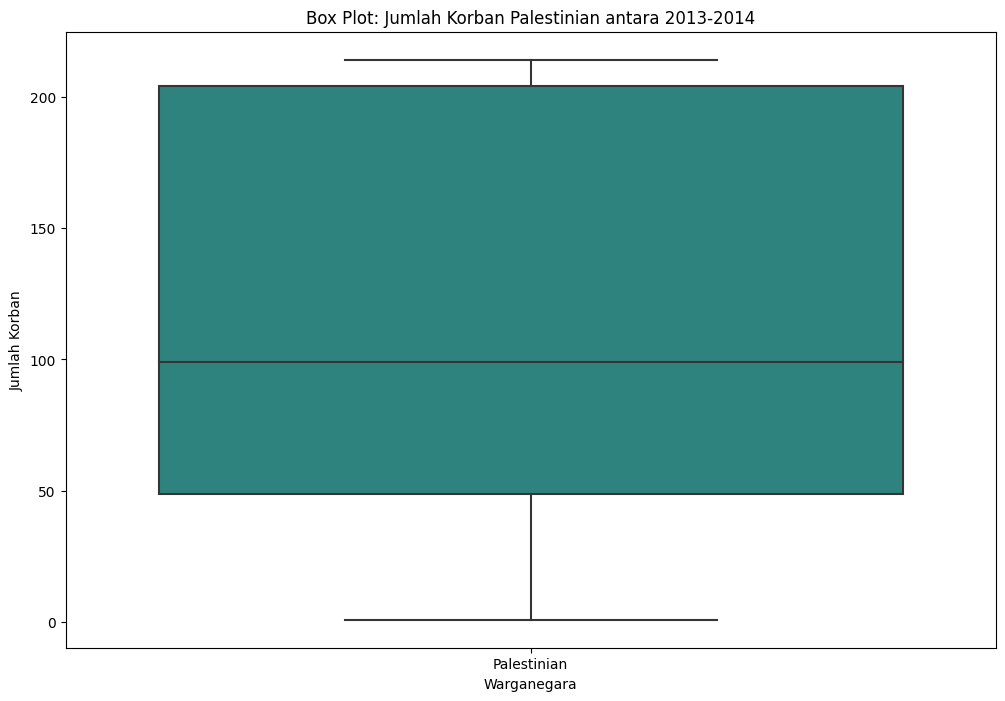

In [27]:
# Box plot untuk melihat distribusi jumlah korban
plt.figure(figsize=(12, 8))
sns.boxplot(x='citizenship', y='total_fatalities', data=data_palestinian_2013_2014, palette='viridis')
plt.title('Box Plot: Jumlah Korban Palestinian antara 2013-2014')
plt.xlabel('Warganegara')
plt.ylabel('Jumlah Korban')
plt.show()

Kita bisa langsung melakukan beberapa pengamatan penting dari plot di atas:

1. Jumlah minimal kematian adalah 1 (min), jumlah maksimal sekitar 214 (maks), dan median jumlah kematian sekitar 100 (median).
2. 25% tahun pada periode 2013 - 2014 memiliki jumlah kematian tahunan sebesar ~50 atau kurang (Kuartil pertama).
2. 75% tahun pada periode 2013 - 2014 memiliki jumlah kematian tahunan sebesar ~200 atau kurang (Kuartil ketiga).

Kita dapat melihat angka sebenarnya dengan memanggil metode `describe()` pada kerangka data.

In [28]:
data_palestinian_2013_2014['total_fatalities'].describe()

count    2310.000000
mean      107.370563
std        70.032922
min         1.000000
25%        49.000000
50%        99.000000
75%       204.000000
max       214.000000
Name: total_fatalities, dtype: float64